<a href="https://colab.research.google.com/github/RonnalOrtiz/First_steps/blob/main/Homogeneidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Análisis pruebas estabilidad y homogeneidad - AGROSAVIA***

*Base de datos agregada a nivel de sub muestra como promedio de las replicas analiticas*

In [41]:
import pandas as pd
archivo = '/content/drive/MyDrive/Agrosavia/Andrea Navarrete/Datos produccion normalizada.xlsx'

df = pd.read_excel(archivo, sheet_name='Homogeneidad')

muestra = df.groupby(['Metodologia','muestra ID',"sub muestra"]).agg({
    "Replica Analitca":["mean","std"],
    "Normalizacion": ["mean","std"]
}).reset_index()

print(muestra)

    Metodologia muestra ID sub muestra Replica Analitca                \
                                                   mean           std   
0   AOAC 986.33          6           A    249666.666667  15502.687939   
1   AOAC 986.33          6           B    251333.333333   9073.771726   
2   AOAC 986.33          6           C    261333.333333   8504.900548   
3   AOAC 986.33         16           A    219666.666667   2516.611478   
4   AOAC 986.33         16           B    249666.666667  12701.705922   
5   AOAC 986.33         16           C    243333.333333  19553.345835   
6   AOAC 986.33         22           A    241666.666667   4932.882862   
7   AOAC 986.33         22           B    247333.333333   4509.249753   
8   AOAC 986.33         22           C    222666.666667   8504.900548   
9   AOAC 986.33         31           A    242666.666667  16802.777548   
10  AOAC 986.33         31           B    240000.000000  10816.653826   
11  AOAC 986.33         31           C    245000.00

*Estadistica descriptiva básica para la metodología ISO4833*

In [42]:
ISO = muestra.loc[muestra["Metodologia"]=="ISO4833"]
ISO.describe()

muestra ID Replica Analitca               Normalizacion           
                             mean           std          mean        std
count  30.000000        30.000000     30.000000     30.000000  30.000000
mean   49.700000    201700.000000  10722.580321      5.303633   0.022905
std    29.698659     10647.738234   6024.246424      0.021945   0.012403
min     6.000000    185666.666667    577.350269      5.268733   0.001352
25%    22.000000    195750.000000   5955.848457      5.291392   0.012641
50%    48.500000    199833.333333  11590.225767      5.300323   0.024904
75%    76.000000    206416.666667  13489.008190      5.314249   0.028355
max    91.000000    241666.666667  30534.133905      5.383131   0.061306

*Estadistica descriptiva básica para la metodología AOAC986*

In [43]:
AOAC = muestra.loc[muestra["Metodologia"]!="ISO4833"]
AOAC.describe()

muestra ID Replica Analitca               Normalizacion           
                             mean           std          mean        std
count  30.000000        30.000000     30.000000     30.000000  30.000000
mean   49.700000    230755.555556   9927.339456      5.361797   0.018508
std    29.698659     15766.236133   6567.346792      0.029679   0.012152
min     6.000000    205333.333333    577.350269      5.312377   0.001203
25%    22.000000    217000.000000   4932.882862      5.336276   0.009041
50%    48.500000    232833.333333   8504.900548      5.366840   0.016061
75%    76.000000    243166.666667  16477.755146      5.385024   0.029152
max    91.000000    261333.333333  20816.659995      5.417043   0.038635

El promedio normalizado para los recuentos de las 10 muestras por la metodología AOAC fue mayor en 0.06 unidades comparado con la metodología ISO, equivalente, apróximadamente a una diferencia de 30000 UFC. El rango de los resultados en ambas metodologías estuvo alrededor de las 56000 UFC, mientras que el rango intercuartilico fue menor par ISO (10667 UFC) comparado con AOAC (26167 UFC).



In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pingouin
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

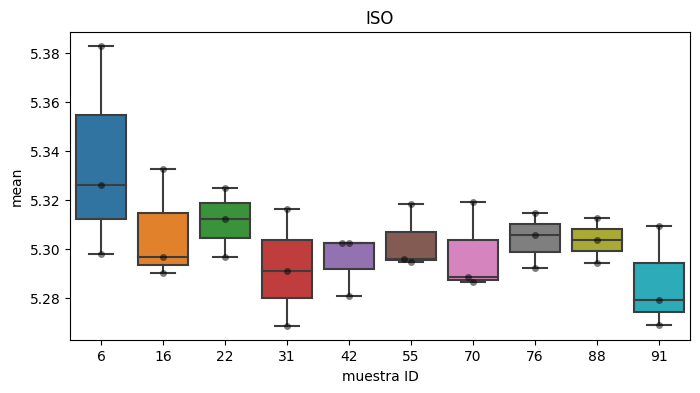

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x=ISO["muestra ID"], y=ISO["Normalizacion"]["mean"], ax=ax).set_title("ISO")
sns.swarmplot(x=ISO["muestra ID"], y=ISO["Normalizacion"]["mean"], color='black', alpha = 0.5, ax=ax);


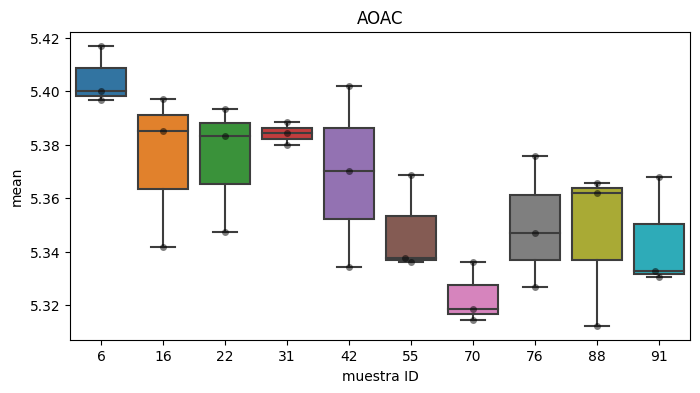

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x=AOAC["muestra ID"], y=AOAC["Normalizacion"]["mean"], ax=ax).set_title("AOAC")
sns.swarmplot(x=AOAC["muestra ID"], y=AOAC["Normalizacion"]["mean"], color='black', alpha = 0.5, ax=ax);

De acuerdo con los gráficos de cajas y bigotes, se puede observar que las sub muestras presentan una menor variación en los análisis por la metodología ISO, en la cual se observa una mayor variabilidad en la muestra 6, mientras que, por el método AOAC se presentó una mayor variabilidad entre muestras. Es importante destacar que en las dos metodologias, la muestra 6 tiene valores normalizados mayores comparado con las otras muestras.

***Comparación entre muestras metodología ISO***

In [47]:
anova = {"muestras":ISO["muestra ID"],"Normalizacion":ISO["Normalizacion"]["mean"]}
anova = pd.DataFrame(anova)

In [48]:
#Cálculo de residuales
m = anova.groupby(["muestras"]).agg({"Normalizacion":"mean"}).reset_index()
anova["muestras"].unique()
m = pd.DataFrame({"muestras":anova["muestras"].unique(),"Promedios":m["Normalizacion"]})
anova = anova.merge(m, how ="inner", on = "muestras")
anova["residuales"] = anova["Normalizacion"]-anova["Promedios"]

Text(0.5, 1.0, 'qqplot-Método ISO')


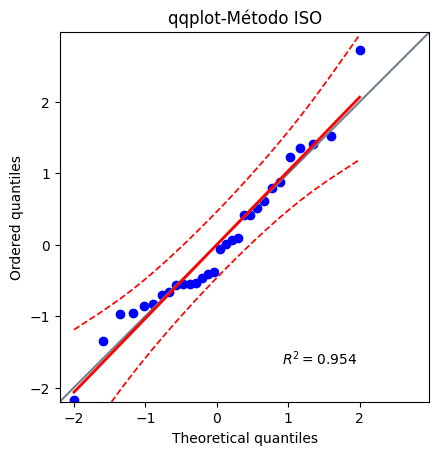

In [49]:
print(pg.qqplot(anova["residuales"], dist='norm').set_title("qqplot-Método ISO"))

In [50]:
#Test de normalidad por la prueba de Shapiro Wilk
pg.normality(anova["residuales"])

,W,pval,normal
residuales,0.963723,0.384197,True


In [52]:
#Prueba de homogeneidad de varianzas
pg.homoscedasticity(data=anova, dv='residuales', group='muestras', method='levene')

,W,pval,equal_var
levene,0.553787,0.817993,True


En la inspección visual del qq-plot para los residuales en la metodología ISO, se puede evidenciar la linearidad en la distribución de los mismos, aunque se observa una leve asimetría de los puntos entorno a la línea promedio de referencia, no hay evidencia gráfica para pensar en el no cumplimiento del supuesto de normalidad, resultado corroborado por la prueba de Shapiro Wilk, cuya valor de probabilidad (SW = 0.3841) indica que no existe evidencia suficiente para descartar la hipótesis asociada a la distribución normal de los residuales.
En cuanto al supuesto de homocedasticidad, la prueba de levene (P = 0.8179) nos indica que no existe evidencia suficiente para rechazar la hipótesis de varianzas homogéneas entre las muestras valoradas en la metodología ISO.

In [53]:
pg.anova(data=anova, dv='Normalizacion', between='muestras', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,muestras,0.004957,9,0.000551,1.222874,0.335539,0.354961
1,Within,0.009008,20,0.000450,NaN,NaN,NaN


De acuerdo con los resultados obtenidos del análisis de varianza, bajo la consideración de un diseño completamente al azar, con la muestra como factor de tratamiento, se encontró que las medias normalizadas para la variable respuesta no fueron estadísticamente diferentes entre muestras (P = 0.3355), de esta forma, se puede concluir con un 95% de confianza, que las muestras fueron homogéneas cuando fueron cuantificadas por la metodología ISO4833.

***Comparación entre muestras metodología AOAC***

In [54]:
anova2 = {"muestras":AOAC["muestra ID"],"Normalizacion":AOAC["Normalizacion"]["mean"]}
anova2 = pd.DataFrame(anova2)

In [55]:
#Cálculo de residuales
n = anova2.groupby(["muestras"]).agg({"Normalizacion":"mean"}).reset_index()
anova2["muestras"].unique()
n = pd.DataFrame({"muestras":anova2["muestras"].unique(),"Promedios":n["Normalizacion"]})
anova2 = anova2.merge(n, how ="inner", on = "muestras")
anova2["residuales"] = anova2["Normalizacion"]-anova2["Promedios"]

Text(0.5, 1.0, 'qqplot-Método AOAC')


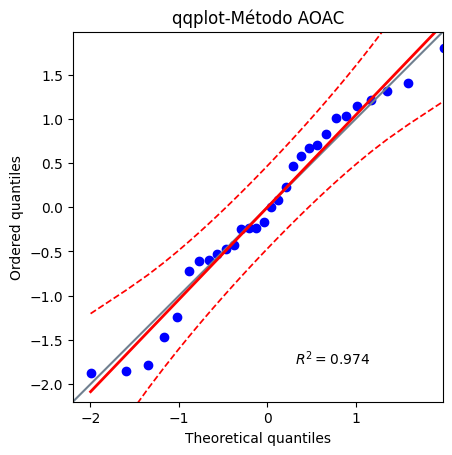

In [56]:
print(pg.qqplot(anova2["residuales"], dist='norm').set_title("qqplot-Método AOAC"))

In [57]:
#Test de normalidad por la prueba Shapiro Wilk
pg.normality(anova2["residuales"])

,W,pval,normal
residuales,0.962713,0.362703,True


In [58]:
#Test para homogeneidad de varianzas
pg.homoscedasticity(data=anova2, dv='residuales', group='muestras', method='levene')

,W,pval,equal_var
levene,0.369847,0.936287,True


Para la metodología AOAC986, el qq-plot muestra un distribución lineal de los residuales y la prueba de shpairo wilk (SW = 0.3627), no muestra evidencia suficiente para el no cumplimiento del supuesto de normalidad, mientras que la prueba de levene indica que las varianzas entre las muestras fueron homogeneas (P = 0.9362).

In [59]:
pg.anova(data=anova2, dv='Normalizacion', between='muestras', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,muestras,0.015318,9,0.001702,3.328806,0.012018,0.599674
1,Within,0.010226,20,0.000511,NaN,NaN,NaN


In [60]:
mediascompar = pg.pairwise_tukey(data=anova2, dv='Normalizacion', between='muestras').round(3)
mediascompar[mediascompar['p-tukey']<=0.05]

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
5,6,70,5.405,5.323,0.081,0.018,4.411,0.008,5.822


De forma similar al análisis para la metodología ISO, se realizó el análisis de varianza bajo un diseño completamente al azar, en el que se encontró que el promedio entre muestras fue significativamente diferente (P = 0.012), lo que implica que bajo esta metodología, al menos una muestra no fue homogenéa para la variable evaluada. La identificación de las muestras que no resultaron homogéneas se realizó mediante la prueba de comparación múltiple de medias Tukey, con esta prueba se encontró que los promedios de las muestras 6 y 70 fueron significativamente diferentes, con una diferencia de 0.081 unidades normalizadas en favor de la muestra 6.

***Comparación entre métodos ISO vs AOAC***

Para realizar la comparación entre métodos, la base de datos fue agregada a nivel de muestra, este ajuste se realizó promediando todas las sub muestras para cada muestra, la cual fue considerada unidad experimental en esta comparación.

In [61]:
muestra2 = df.groupby(['Metodologia','muestra ID']).agg({
    "Replica Analitca":["mean","std"],
    "Normalizacion": ["mean","std"]
}).reset_index()

print(muestra2)

    Metodologia muestra ID Replica Analitca               Normalizacion  \
                                       mean           std          mean   
0   AOAC 986.33          6    254111.111111  11340.683891      5.404635   
1   AOAC 986.33         16    237555.555556  18028.526778      5.374660   
2   AOAC 986.33         22    237222.222222  12427.567922      5.374611   
3   AOAC 986.33         31    242555.555556  13648.361725      5.384202   
4   AOAC 986.33         42    234555.555556  19994.443673      5.368807   
5   AOAC 986.33         55    223000.000000  13720.422734      5.347601   
6   AOAC 986.33         70    210555.555556   6444.204976      5.323190   
7   AOAC 986.33         76    224111.111111  12025.436005      5.349910   
8   AOAC 986.33         88    222777.777778  17984.561280      5.346638   
9   AOAC 986.33         91    221111.111111  14995.369656      5.343714   
10      ISO4833          6    217555.555556  20821.329875      5.335826   
11      ISO4833         1

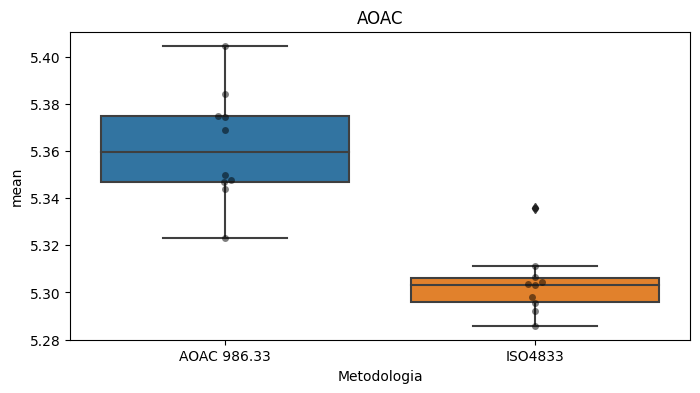

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x=muestra2["Metodologia"], y=muestra2["Normalizacion"]["mean"], ax=ax).set_title("AOAC")
sns.swarmplot(x=muestra2["Metodologia"], y=muestra2["Normalizacion"]["mean"], color='black', alpha = 0.5, ax=ax);

El gráfico de cajas y bigotes muestra que la metodología AOAC986 tuvo mayores valores de recuento, en comparación con los resultados por ISO4833, de igual forma, se evidencia una mayor variabilidad en los resultados del primero método.

In [70]:
anova3 = {"Metodologia":muestra2["Metodologia"],"Normalizacion":muestra2["Normalizacion"]["mean"]}
anova3 = pd.DataFrame(anova3)

In [71]:
#Cálculo de residuales
p = anova3.groupby(["Metodologia"]).agg({"Normalizacion":"mean"}).reset_index()
anova3["Metodologia"].unique()
p = pd.DataFrame({"Metodologia":anova3["Metodologia"].unique(),"Promedios":p["Normalizacion"]})
anova3 = anova3.merge(p, how ="inner", on = "Metodologia")
anova3["residuales"] = anova3["Normalizacion"]-anova3["Promedios"]

Text(0.5, 1.0, 'qqplot-Metodologias')


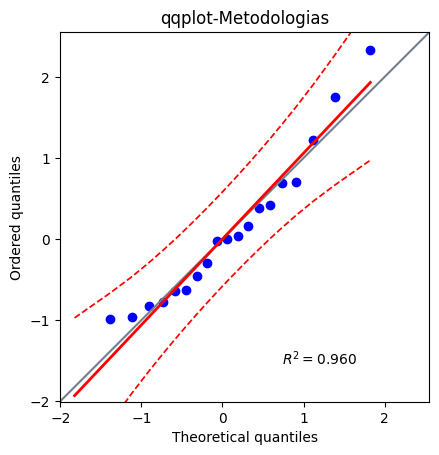

In [73]:
print(pg.qqplot(anova3["residuales"], dist='norm').set_title("qqplot-Metodologias"))

In [74]:
#Test de normalidad de los residuales por Shapiro Wilk
pg.normality(anova3["residuales"])

,W,pval,normal
residuales,0.969866,0.752049,True


In [78]:
#Prueba de homogeneidad de varianzas
pg.homoscedasticity(data=anova3, dv='residuales', group='Metodologia', method='levene')

,W,pval,equal_var
levene,4.786962,0.04211,False


Del gráfico qq-plot y la prueba de normalidad, se puede concluir que los residuales siguen una distribución normal (SW = 0.752). Para el caso de la homocedasticidad y como se evidenció en los gráficos de cajas y bigotes, con un 5% de significancia, se tiene evidencia estadística suficiente para considerar que las varianzas entre las metodologías no fueron homogéneas. Dado este resultado, la comparación entre metodologías se realizó mediante una prueba t para muestras independientes bajo la consideración de varianzas heterogéneas.

In [85]:
import scipy.stats as stats

ISOsample = anova3.loc[anova3["Metodologia"]!='AOAC 986.33']
AOACsample = anova3.loc[anova3["Metodologia"]=='AOAC 986.33']
AOACsample["Normalizacion"]

#Prueba t pareada para muestras independientes con varianzas heterogéneas
t_stat, p_value = stats.ttest_ind(ISOsample["Normalizacion"], AOACsample["Normalizacion"], equal_var=False)

# Imprimir resultados
print("Estadistico-T:", t_stat)
print("Probabilidad:", p_value)

# Interpretar resultados
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Se rechazá la hipótesis nula. Existe una diferencia significativa entre grupos")
else:
    print("No existe evidencia para rechazar la hipótesis nula. No existe una diferencia significativa entre grupos")


Estadistico-T: -6.712058403217846
Probabilidad: 8.978808113395145e-06
Se rechazá la hipótesis nula. Existe una diferencia significativa entre grupos


In [86]:
pg.pairwise_tukey(data=anova3, dv='Normalizacion', between='Metodologia').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,AOAC 986.33,ISO4833,5.362,5.304,0.058,0.009,6.712,0.0,2.875


De acuerdo con el resultado de la prueba T, el promedio entre las metodologías fue estadisticamente diferente, siendo superior en 0.058 unidades normalizadas para AOAC986 comparado con ISO4833.